In [5]:
#Comentário pós aula
"""
O professor ensina a utilizar o modelo de KNN para regressão (não categorização)

Vai testar como fazer o KNN para prever o preço de casas com scaling e sem scaling
- Com scaling aumenta a assertividade do modelo
"""

'\nO professor ensina a utilizar o modelo de KNN para regressão (não categorização)\n\nVai testar como fazer o KNN para prever o preço de casas com scaling e sem scaling\n- Com scaling aumenta a assertividade do modelo\n'

# Aula 02 - KNN para regressão

Na aula anterior, discutimos bastante sobre diversas questões a partir da motivação do KNN, incluindo scaling dos dados. Continuaremos a explorar essas abordagens também em outros modelos.

Nesta aula, continuaremos nosso enfoque no KNN, mas agora para problemas de regressão. Veremos, na verdade, que o funcionamento é bastante parecido!

## Utilizando KNN para regressão

O KNN pode ser utilizado para ambos os problemas de classificação e regressão!

A ideia é bem simples: o target atribuído a uma nova observação é igual à **média do target das $k$ observações mais próximas**

<img src="https://bookdown.org/f100441618/bookdown-regresion/www/KNN.jpg" width=500>

Naturalmente, também para regressão o parâmetro $k$ e a métrica de distância são hiperparâmetros importantes.

A classe no sklearn é a [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html). Dê uma olhada no User Guide e também no [RadiusNeighborsRegressor!](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsRegressor.html#sklearn.neighbors.RadiusNeighborsRegressor)

In [6]:
#from sklearn.neighbors import KNeighborsRegressor

#### Conforme temos visto, temos o passo a passo abaixo para seguir:
- Fazer todo o processo de limpeza e avaliação da base, EDA, etc., etc.
- Importar a **classe do algoritmo que se deseja treinar**
        - Usaremos quase sempre a biblioteca [scikit-learn](https://scikit-learn.org/stable/)
    
  
- Instanciar a classe do algoritmo, **escolhendo os hiperparâmetros desejados**
        - Para a primeira versão do modelo, podemos seguir com os parâmetros-padrão;
        - Alternativamente, podemos ajustar melhor os hiperparâmetros, mas isto está além do escopo desta aula.
    
   
- Separe os dados em **dados de treino** e **dados de teste**.
        - Em alguns casos, pode ser interessante criar também um conjunto de **dados de validação**
        - Para fazer a separação, usamos o [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    
- Treine o modelo, usando **os dados de treino**

- Use o modelo treinado para **fazer previsões** usando os **dados de teste** (ou **de validação**)

- **Avalie a performance do modelo com base nas previsões acima**

- Se necessário, reinicie o ciclo!

- Quando o modelo estiver suficientemente bom, faça o **deploy**

In [7]:
"""Passos:
1) Limpeza da base
2) Importar classe dos algoritmos pra treinar
3) Escolher hiperparâmetro
4) Separar treino e teste (train_test_split())
5) Treinar o modelo
6) Fazer previsões (validação) dos dados de teste
7) Avaliar a performance do modelo
8) Fazer deploy (+ gráficos)
"""

'Passos:\n1) Limpeza da base\n2) Importar classe dos algoritmos pra treinar\n3) Escolher hiperparâmetro\n4) Separar treino e teste (train_test_split())\n5) Treinar o modelo\n6) Fazer previsões (validação) dos dados de teste\n7) Avaliar a performance do modelo\n8) Fazer deploy (+ gráficos)\n'

___
### Exemplo prático: KNN como regressor

Vamos explorar, agora, a aplicação do KNN como regressor ao problema de predição de preços de imóveis, a partir [desta base](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

In [8]:
from sklearn.neighbors import KNeighborsRegressor #neighbors
from sklearn.model_selection import train_test_split #model_selection
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error #metrics
from sklearn.preprocessing import StandardScaler #preprocessing

Descrição das colunas, conforme documentação do dataset:

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

**Objetivo:** a partir de informações e características da casa, é possível determinar o seu preço

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv(r"C:\Users\Danie\Downloads\train.csv")

In [12]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
df.shape #quantas linhas e colunas

(1460, 81)

Existem dados faltantes?

In [14]:
df.isna().sum() # .isna() = valores nulos

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [15]:
# Selecionar apenas as colunas numéricas
df = df.select_dtypes(include = np.number).dropna() #seleciona colunas numéricas e exclui dados nulos

In [16]:
df.drop(columns = "Id", inplace = True) #tira a coluna ID (não relevante para o modelo)

In [17]:
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [18]:
# Definir quem são as features e quem é o target (aquilo que queremos prever)
X = df.drop(columns = ["SalePrice"]) # features = df inteiro (menos 'SalePrice')
y = df["SalePrice"] # Regressão - só "SalePrice'

# Separar os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42) # ou test_size = 0.2
#Separo os dados de treino e teste do X e do y

In [19]:
X_train.shape #caiu de 86 colunas para 36 colunas
#896 linhas pra treinamento

(896, 36)

In [20]:
X_test.shape #225 linhas para teste

(225, 36)

In [21]:
knn_reg = KNeighborsRegressor() #knn_reg = função
knn_reg.fit(X_train, y_train) #fitar os dados de treino (estudar) = train de X e y
y_pred1 = knn_reg.predict(X_test) #palpite (predição) do regressor (prática) sobre os dados de X_test - que ele nunca viu antes = y_pred1
#No predict você passa apenas o X_test (as perguntas). 
#O y_test (as respostas reais) fica escondido - para que depois, você possa comparar o y_pred1 (chute do modelo) com o y_test (verdade) 
#e ver se o seu modelo é bom de chute ou não.

In [22]:
def print_regression_evaluation_metrics(y_test, y_pred): #criando uma função com vários prints
    print("Métricas de avaliação: ")
    
    print(f"R^2: {r2_score(y_test, y_pred):.2f}") 
    #R^2:Coeficiente de Determinação - O quanto o seu modelo explica os dados
    #escala: 0 a 1 (ou 0% a 100%)
    #RESULTADO (0.64) = o modelo explica 64% da variação dos dados
    
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}") 
    #MAE: Erro Médio Absoluto - Qual o erro médio bruto
    #É a média da distância entre o que você previu e o valor real
    #RESULTADO (30450.46) - em média, os palpites erraram 30450.46 (pra mais ou pra menos)
    
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}") 
    #RMSE: Raiz do Erro Quadrático Médio - Qual o peso dos erros grandes
    #MAE que pune severamente erros grandes
    #RESULTADO: Se o RMSE for muito maior que o MAE, está dando "chutes" longe do alvo em alguns casos (outliers)
    
    print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred):.2f}") 
    #MAPE: Erro Médio Percentual Absoluto - Qual a porcentagem média do erro
    # RESULTADO (0.15) = o modelo 15% em média
    

In [23]:
print_regression_evaluation_metrics(y_test, y_pred1)

Métricas de avaliação: 
R^2: 0.64
MAE: 30450.46
RMSE: 53556.08
MAPE: 0.15


Text(0.5, 1.0, 'Comparativo de predições e valores reais - conjunto de teste')

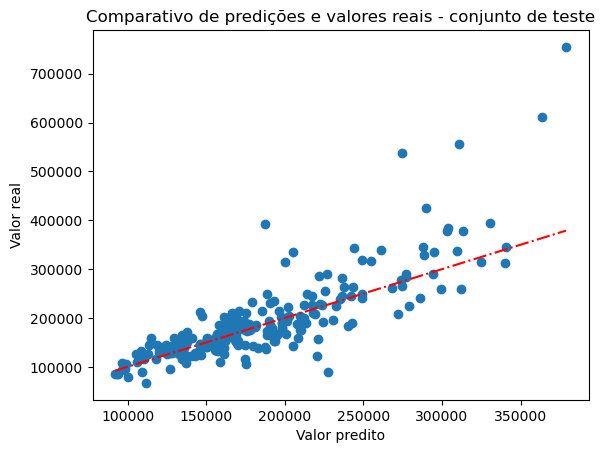

In [24]:
plt.scatter(y_pred1, y_test) #dispersão da previsão e do teste real (y)
plt.xlabel("Valor predito") #chute = no X
plt.ylabel("Valor real") # realidade = no Y

x = np.linspace(y_pred1.min(), y_pred1.max()) #linha = começe no valor mínimo e termine no valor máximo da predição
plt.plot(x, x, '-.r') #linha de referência (para cada valor de x, use o mesmo para y)
# r = cor(vemelho) / -. = tipo da linha
plt.title("Comparativo de predições e valores reais - conjunto de teste")

In [25]:
# normalização/padronização -> sempre com os dados de TREINAMENTO
scaler = StandardScaler() #tentar fazer a normalização dos dados pra melhorar os resultados

# scaler.fit(X_train) 
# X_train = scaler.transform(X_train)
X_train_sc = scaler.fit_transform(X_train) # usando o conjunto de treinamento para definir a padronização
#essa função faz danto o fit quanto o transform
#OBS: aqui fazemos o fit do SCALER
#crio a variável X_train_sc - dados de TREINO escalados

X_test_sc = scaler.transform(X_test) #no teste a gente não faz fit (treino) - só transform
#crio a variável X_test_sc - dados de TESTE escalados

# Instanciar o modelo
knn_reg = KNeighborsRegressor()

# Ajustar com os dados de treino - treinamento do modelo
knn_reg.fit(X_train_sc, y_train) #OBS: aqui fazemos o fit do REGRESSOR (dados de TREINO escalados de X, e de TREINO de y)
#Sempre fazer o fit SÓ DO TREINO, não dos dados de teste 

# Calcular a predição
y_pred2 = knn_reg.predict(X_test_sc)
#y_pred2 será uma predição de knn_reg utilizando os dados de TESTE escalados de X

In [26]:
print_regression_evaluation_metrics(y_test, y_pred2) #rodar regressão de Y (dados de teste e da predição)

    #R^2:Coeficiente de Determinação - O quanto o seu modelo explica os dados
#Subiu de 64% para 78% (mais assertividade)

    #MAE: Erro Médio Absoluto - Qual o erro médio bruto
#Caiu de 30450.46 para 23891.49 (menos erro)

    #RMSE: Raiz do Erro Quadrático Médio - Qual o peso dos erros grandes
#Caiu de 53556.08 para 41656.77 (menos erros grandes)

    #MAPE: Erro Médio Percentual Absoluto - Qual a porcentagem média do erro
#Caiu de 15% para 12% - Erramos 3% a menos


Métricas de avaliação: 
R^2: 0.78
MAE: 23891.49
RMSE: 41656.77
MAPE: 0.12


Text(0.5, 1.0, 'Comparativo de predições e valores reais - conjunto de teste')

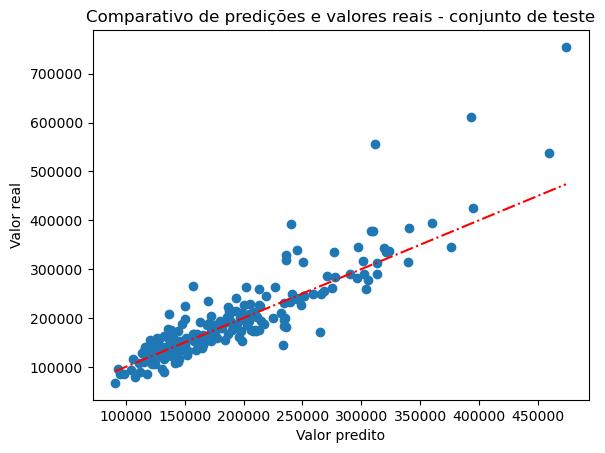

In [27]:
plt.scatter(y_pred2, y_test) #Dispersão da predição 2
plt.xlabel("Valor predito")
plt.ylabel("Valor real")

x = np.linspace(y_pred2.min(), y_pred2.max())
plt.plot(x, x, '-.r')
plt.title("Comparativo de predições e valores reais - conjunto de teste")

#Erramos muito menos os valores menores 
#Os maiores erros foi quando o imóvel estava com um preço muito maior do que seria normal pelo modelo

Vemos como, apenas com o scaling dos dados, já melhoramos consideravelmente nossos resultados!

In [28]:
def plot_predicted_vs_actual_values(y_test, y_pred, title_str): #cria uma função para comparar os gráficos
    plt.scatter(y_pred, y_test) #dispersão para predição (modelo) e teste (dados reais)
    plt.xlabel("Valor predito")
    plt.ylabel("Valor real")

    x = np.linspace(y_pred.min(), y_pred.max()) #linha do ideal (do menor ao maior valor predito
    plt.plot(x, x, '-.r')
    plt.title(title_str) #título geral dos dois gráficos

Text(0.5, 0.98, 'Comparativo de predições - base de teste')

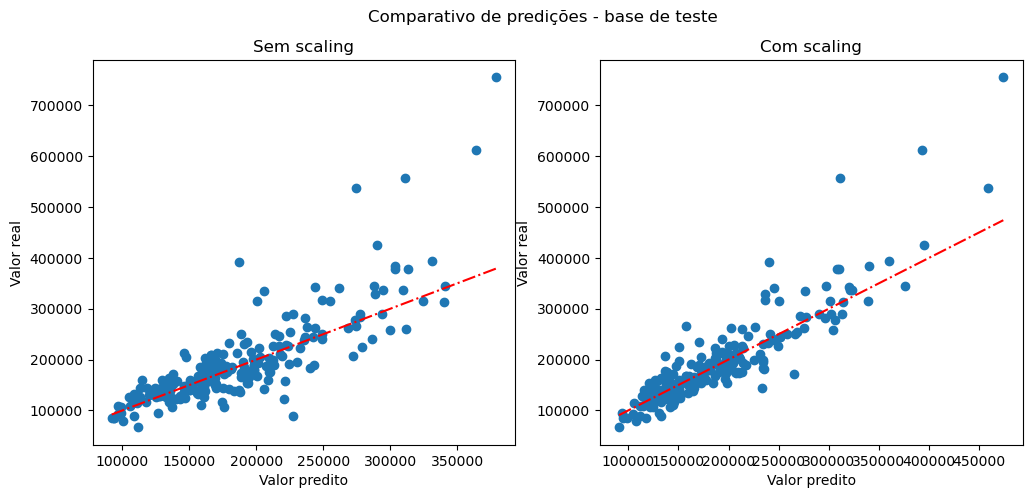

In [29]:
plt.figure(figsize = (12, 5)) #tamanho da figura

plt.subplot(1,2,1) #1 linha (mesma altura), 2 colunas (cada um no seu quadrado), posição 1(esquerda)
plot_predicted_vs_actual_values(y_test, y_pred1, "Sem scaling") #roda função com dados de y(fato) e pred1 (modelo sem scaling)

plt.subplot(1,2,2) #1 linha (mesma altura), 2 colunas (cada um no seu quadrado), posição 2(direita)
plot_predicted_vs_actual_values(y_test, y_pred2, "Com scaling") #roda função com dados de y(fato) e pred2 (modelo com scaling)

plt.suptitle("Comparativo de predições - base de teste") #título superior geral

Vimos que, com o simples scaling dos dados, já tivemos uma melhora considerável na capacidade de predição do nosso modelo de regressão. Vamos, agora, estudar em mais detalhes algumas ferramentas do scikit-learn que nos permitirão melhorar os modelos com mais facilidade!

___